In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

In [2]:
all_files = glob.glob("../roll_data/*-consumers.csv")

df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)

# select season (zero indexed)
# seasons = [11,12,13,14]
# season = 13
# df = df[df['season'] == season]
df = df[df['season'] == 14]

C:\Users\rcorc\AppData\Local\Temp\ipykernel_7636\4098034931.py:3: DtypeWarning: Columns (131) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)
C:\Users\rcorc\AppData\Local\Temp\ipykernel_7636\4098034931.py:3: DtypeWarning: Columns (131) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f, dtype={"stadium_id": "string"}) for f in all_files), ignore_index=True)


In [3]:
print(df.columns.tolist())

['event_type', 'roll', 'passed', 'batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon', 'batter_multiplier', 'runner_on_first_base_thirst', 'runner_on_first_continuation', 'runner_on_first_ground_friction', 'runner_on_first_indulgence', 'runner_on_first_laserlikeness', 'runner_on_first_multiplier', 'runner_on_second_base_thirst', 'runner_on_second_continuation', 'runner_on_second_ground_friction', 'runner_on_second_indulgence', 'runner_on_second_laserlikeness', 'runner_on_s

In [4]:
df = df[df["roll"] < 0.02]

df_attack = df[df["event_type"].astype(str).str.contains("Attack")]
df_noattack = df[df["event_type"].astype(str).str.contains("Miss")]
df_target = df[~df["event_type"].astype(str).str.contains("Attack|Miss")]

print(df_attack)
print(df_target)
print(df_noattack)

      event_type      roll passed  batter_buoyancy  batter_divinity  \
21155     Attack  0.000102   True         1.036379         0.222922   
21235     Attack  0.001612   True         1.000719         0.983065   
21356     Attack  0.002335   True         0.700063         0.382737   
21663     Attack  0.003975   True         0.536775         0.276554   
21722     Attack  0.004350   True         0.175481         0.998298   
...          ...       ...    ...              ...              ...   
90061     Attack  0.001441   True         0.791459         1.036589   
90095     Attack  0.001476   True         1.006218         0.873335   
90163     Attack  0.001329   True         0.332626         0.829225   
90282     Attack  0.000087   True         0.484179         0.483753   
90590     Attack  0.000779   True         0.445443         1.074277   

       batter_martyrdom  batter_moxie  batter_musclitude  batter_patheticism  \
21155          1.153183      1.028871           0.834127           

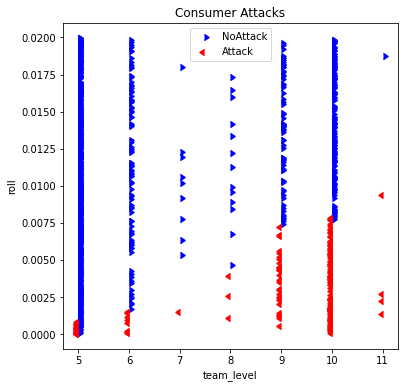

In [5]:
y_val = "roll"
x_val = "team_level"
df_noattack = df_noattack.copy()
df_attack = df_attack.copy()

fig, ax = plt.subplots(1, figsize=(6, 6))

ax.scatter(
     df_noattack[x_val],
     df_noattack[y_val],
     color="blue",
     label="NoAttack",
     marker=CARETRIGHTBASE,
 )
ax.scatter(
     df_attack[x_val],
     df_attack[y_val],
     color="red",
     label="Attack",
     marker=CARETLEFTBASE,
 )
ax.set_xlabel(x_val)
ax.set_ylabel(y_val)
ax.set_title("Consumer Attacks")

if x_val == "threshold":
    ax.plot(ax.get_xlim(), ax.get_xlim())

ax.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

y = df['passed'].astype(int)

x = df[['roll']]

sc = StandardScaler()

trainedsvm = svm.LinearSVC(dual=False, C=100000, max_iter=10000, tol=1e-10).fit(x, y)
predictionsvm = trainedsvm.predict(x)
confusion_matrix(y,predictionsvm)